In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("33_titanic.csv")
df

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0
...,...,...,...,...
886,NaN,211536,3,0
887,B42,112053,3,1
888,NaN,W./C. 6607,1,0
889,C148,111369,2,1


In [4]:
# handling number column

In [5]:
df["number"].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

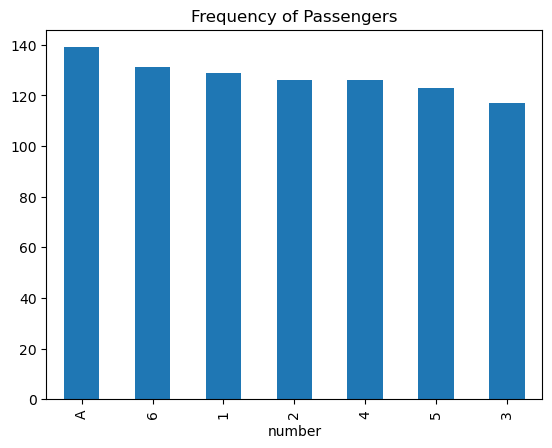

In [12]:
fig = df["number"].value_counts().plot.bar()
fig.set_title("Frequency of Passengers")
plt.show()

In [14]:
# how to extract numerical data
df["number_numerical"] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [17]:
df["number_categorical"] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)
#where function select values based on condition
#general syntax : np.where(condition,x,y)
# when condition is true pick x else pick y

# ex.arr = np.array([10, 20, 30, 40])
#result = np.where(arr > 20, "High", "Low")

In [42]:
df # you can also feel the nan values

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,Cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
...,...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN,211536.0,NaN
887,B42,112053,3,1,3.0,NaN,42,B,112053.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN,6607.0,W./C.
889,C148,111369,2,1,2.0,NaN,148,C,111369.0,NaN


In [19]:
# how to handle cabin and Ticket

In [43]:
# Cabin # graph just shoing how this make the data good

<Axes: xlabel='Cabin'>

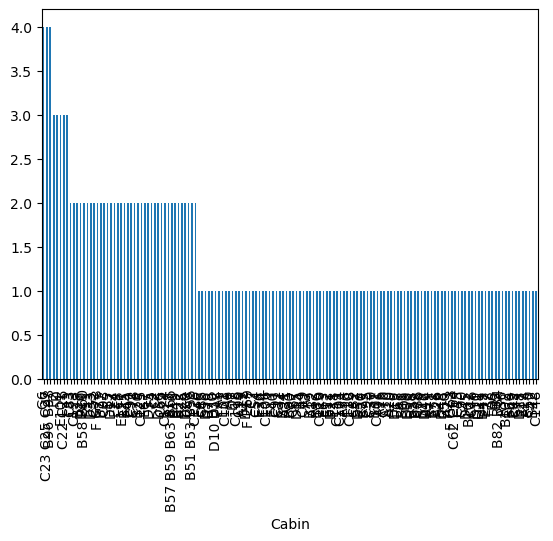

In [36]:
df['Cabin'].value_counts().plot(kind='bar')

In [30]:
df["Cabin_num"] = df['Cabin'].str.extract('(\d+)') # this extracts inly numbers from that string

In [27]:
df["Cabin_cat"] = df['Cabin'].str[0]

<Axes: xlabel='Cabin_cat'>

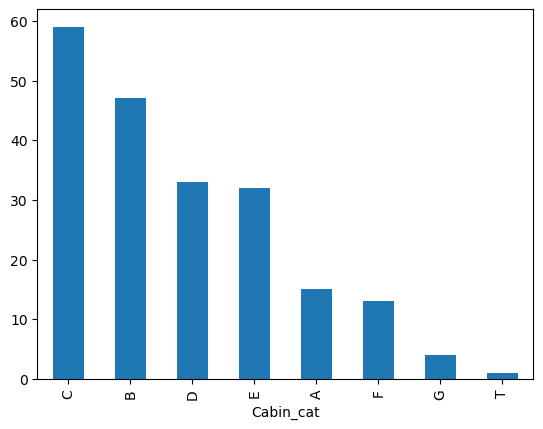

In [38]:
df['Cabin_cat'].value_counts().plot(kind='bar')

In [28]:
df

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,Cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN
...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN
887,B42,112053,3,1,3.0,NaN,42,B
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN
889,C148,111369,2,1,2.0,NaN,148,C


In [29]:
# Ticket

In [40]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                 errors='coerce',
                                 downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'])

In [41]:
df

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,Cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
...,...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN,211536.0,NaN
887,B42,112053,3,1,3.0,NaN,42,B,112053.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN,6607.0,W./C.
889,C148,111369,2,1,2.0,NaN,148,C,111369.0,NaN
